In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib


from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score



In [ ]:
drive.mount(f'/content/drive/', force_remount=False)

path_to_disk = pathlib.Path(f'/content/drive/My Drive/')

Mounted at /content/drive/


In [ ]:
# Загружаем данные
df = pd.read_excel(path_to_disk / '/content/drive/MyDrive/Colab Notebooks/uz/uybor.xlsx')


# Feature Engineering

Набор данных содержит следующие столбцы:

address  - примерный адрес недвижимости

district  - район, в котором находится недвижимость

rooms  - количество комнат

size  - общий размер квартиры в квадратных метрах

level  - на каком уровне находится юнит

max_levels - максимальные уровни здания

price  - цена в долларах США

lat  - широта

lng - долгота

In [ ]:
df.sample(5)

,address,district,rooms,size,level,max_levels,price,lat,lng
2158,"город Ташкент, Yakkasaroy район, Ракат",Yakkasaroy,2,36.00,2,4,29500,41.287612,69.245423
328,"город Ташкент, Chilonzor район, Чиланзар 8-й к...",Chilonzor,4,94.00,4,5,73000,41.289442,69.205802
6503,"город Ташкент, Mirzo Ulugbek район, Элобод",Mirzo Ulugbek,2,58.00,4,5,31500,41.323957,69.223209
1592,"город Ташкент, Mirzo Ulugbek район, Феруза-1",Mirzo Ulugbek,1,38.00,3,4,22500,41.355065,69.358594
812,"город Ташкент, Mirzo Ulugbek район, Паркентска...",Mirzo Ulugbek,2,53.06,3,7,53000,41.315120,69.323493


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     7421 non-null   object 
 1   district    7421 non-null   object 
 2   rooms       7421 non-null   int64  
 3   size        7421 non-null   float64
 4   level       7421 non-null   int64  
 5   max_levels  7421 non-null   int64  
 6   price       7421 non-null   int64  
 7   lat         7421 non-null   float64
 8   lng         7421 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 521.9+ KB


In [ ]:
df.describe()

,rooms,size,level,max_levels,price,lat,lng
count,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000
mean,2.619728,73.150726,3.699367,6.031397,59117.618919,41.303620,69.256615
std,1.076887,36.999670,2.239028,2.607673,46701.090308,0.033771,0.059061
min,1.000000,14.000000,1.000000,1.000000,10500.000000,41.186375,69.148915
25%,2.000000,50.000000,2.000000,4.000000,35000.000000,41.281265,69.205802
50%,3.000000,65.000000,3.000000,5.000000,46500.000000,41.296388,69.260189
75%,3.000000,85.000000,5.000000,9.000000,66847.000000,41.324956,69.293713
max,10.000000,456.000000,19.000000,25.000000,800000.000000,41.424522,69.588687


In [ ]:
df.replace({'Olmzor': 'Olmazor'},inplace=True)

In [ ]:
column1 = df[df.price < 100000]
column2 = df[(df['price'] >= 100000) & (df['price'] < 300000)]
column3 = df[df.price > 300000]


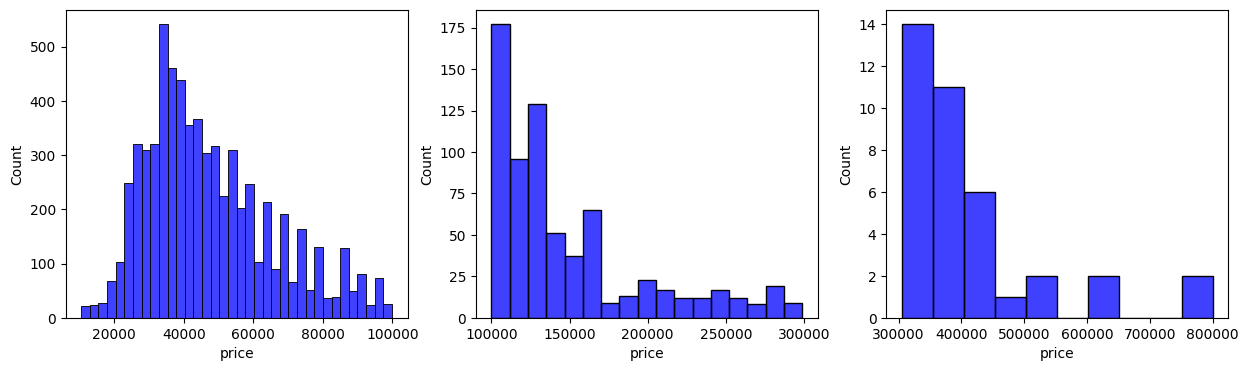

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
sns.histplot(column1.price, color='b',ax=ax[0])
sns.histplot(column2.price, color='b',ax=ax[1])
sns.histplot(column3.price, color='b',ax=ax[2])


plt.show()


<Axes: xlabel='district', ylabel='Count'>

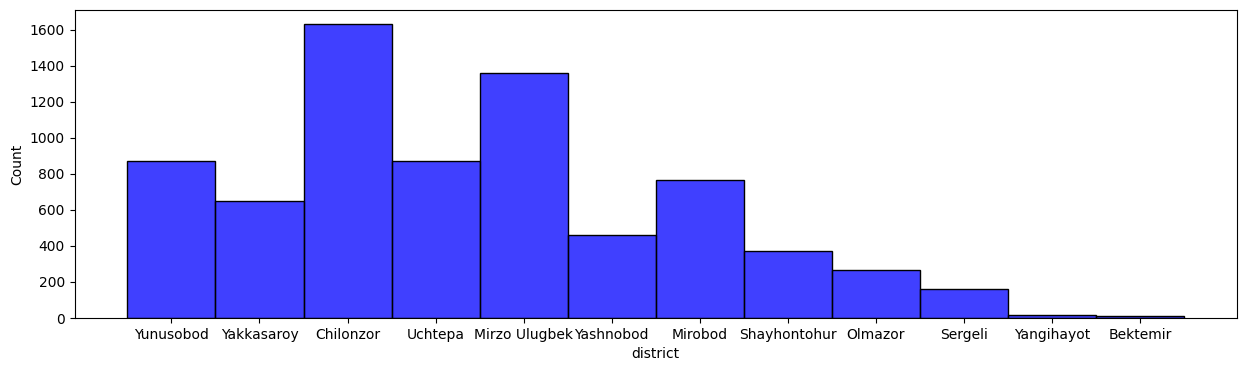

In [ ]:
plt.subplots(figsize=(15, 4))
sns.histplot(df.district, color='b')


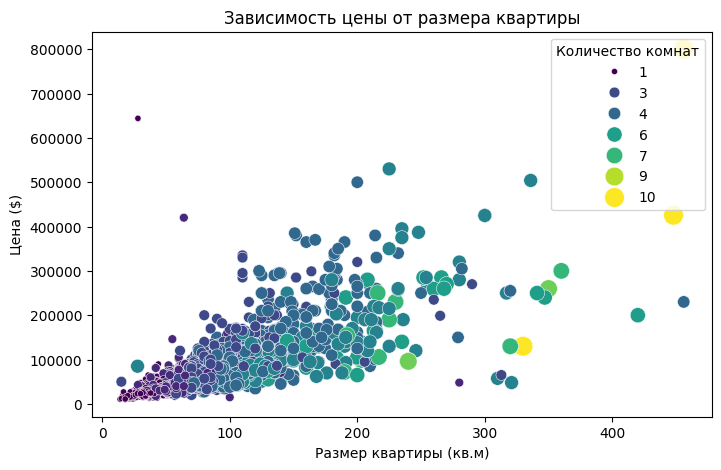

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='size', y='price', hue='rooms', palette='viridis', size='rooms', sizes=(20, 200))
plt.title('Зависимость цены от размера квартиры')
plt.xlabel('Размер квартиры (кв.м)')
plt.ylabel('Цена ($)')
plt.legend(title='Количество комнат')
plt.show()

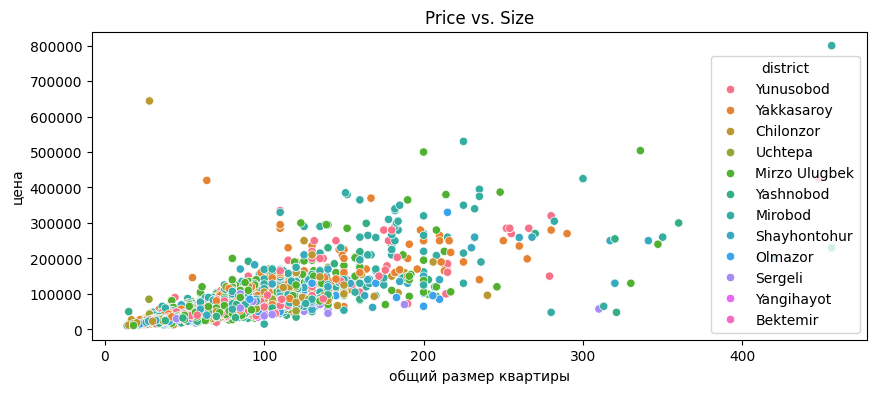

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

# График разброса (scatter plot)
sns.scatterplot(x='size', y='price', data=df, hue='district')
plt.title('Price vs. Size')
plt.xlabel('общий размер квартиры')
plt.ylabel('цена')
plt.show()

# Отображаем графики
plt.show()

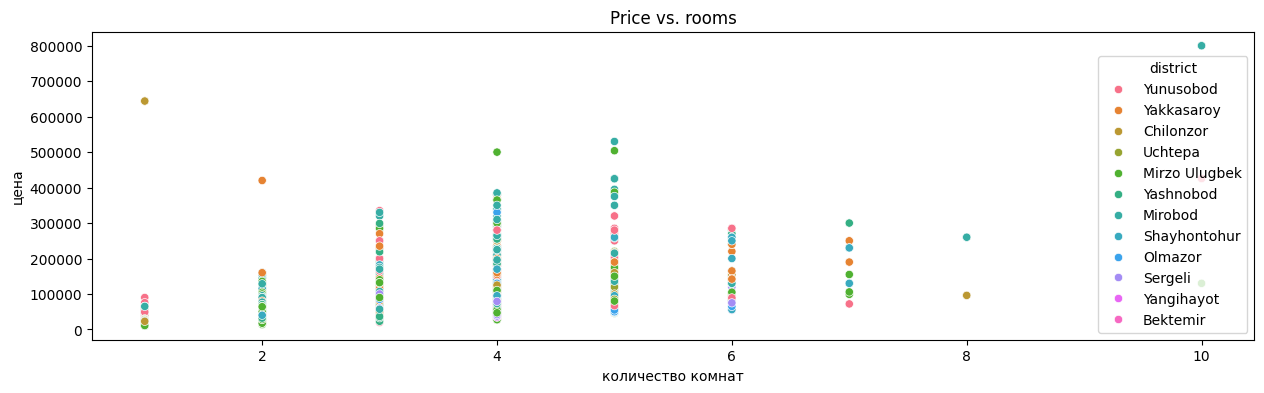

In [ ]:
fig, ax = plt.subplots(figsize=(15, 4))

# График разброса (scatter plot)
sns.scatterplot(x='rooms', y='price', data=df, hue='district')
plt.title('Price vs. rooms')
plt.xlabel('количество комнат')
plt.ylabel('цена')

plt.show()


<Axes: xlabel='max_levels', ylabel='rooms'>

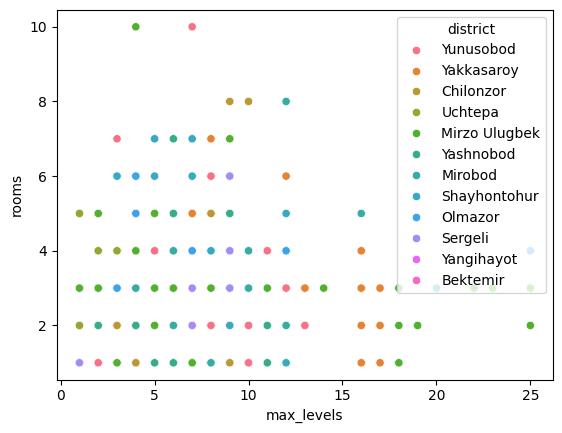

In [ ]:
sns.scatterplot(x='max_levels',y='rooms',data=df, color='b', hue='district')

<ipython-input-17-00e071af7ba9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='level', y='price', palette='pastel')


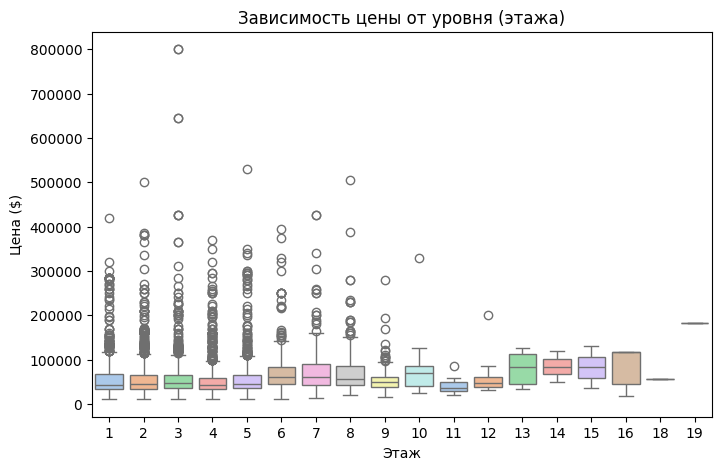

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='level', y='price', palette='pastel')
plt.title('Зависимость цены от уровня (этажа)')
plt.xlabel('Этаж')
plt.ylabel('Цена ($)')
plt.show()

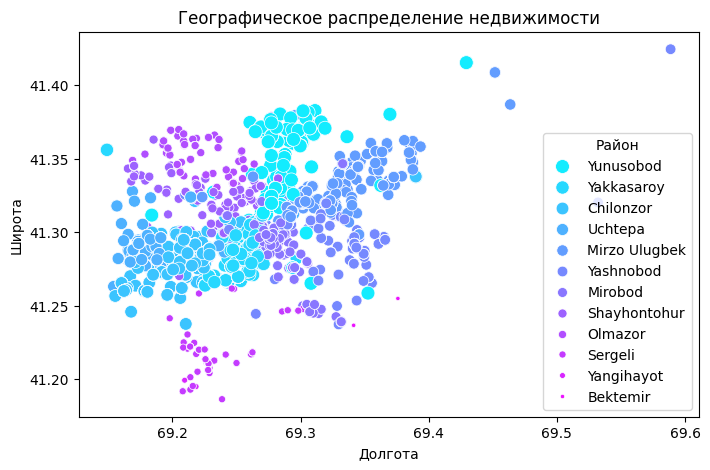

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='lng', y='lat', hue='district',size='district', palette='cool', sizes=(10, 100))
plt.title('Географическое распределение недвижимости')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.legend(title='Район')
plt.show()

<ipython-input-19-35fed79882bd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_price_per_district, x='district', y='price_per_sqm', palette='rocket')


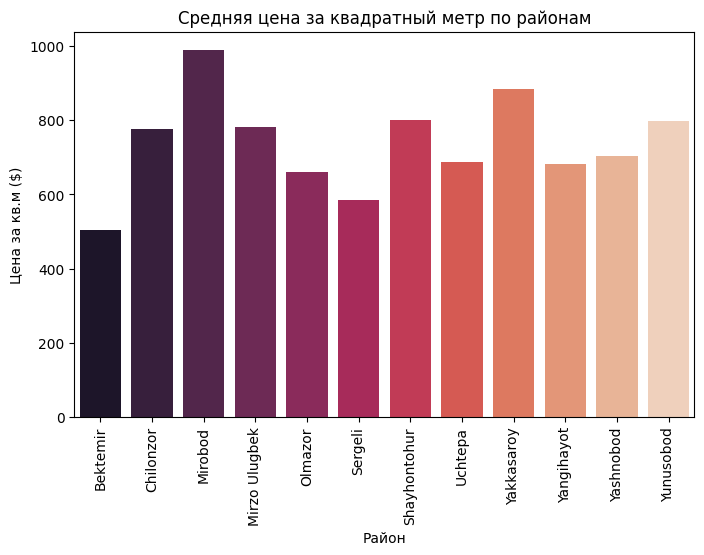

In [ ]:
df['price_per_sqm'] = df['price'] / df['size']
mean_price_per_district = df.groupby('district')['price_per_sqm'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=mean_price_per_district, x='district', y='price_per_sqm', palette='rocket')
plt.title('Средняя цена за квадратный метр по районам')
plt.xlabel('Район')
plt.ylabel('Цена за кв.м ($)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.drop('address', axis=1, inplace=True)

In [ ]:
df.sample(5)

,district,rooms,size,level,max_levels,price,lat,lng,price_per_sqm
793,Mirobod,3,75.0,8,9,75000,41.296644,69.275878,1000.000000
4073,Yunusobod,3,73.0,3,5,60000,41.374408,69.277185,821.917808
497,Mirzo Ulugbek,2,60.0,1,5,46000,41.347549,69.387577,766.666667
6810,Chilonzor,2,49.0,1,4,37000,41.289442,69.205802,755.102041
6953,Shayhontohur,2,68.0,6,9,68000,41.311412,69.241950,1000.000000


In [ ]:
ohe = OneHotEncoder(sparse_output=False)
ohe_df = pd.DataFrame(ohe.fit_transform(df[['district']]), columns=ohe.get_feature_names_out())
df = pd.concat([df, ohe_df], axis=1)

In [ ]:
df.drop('district', axis=1, inplace=True)

In [ ]:
df.sample(5)

,rooms,size,level,max_levels,price,lat,lng,price_per_sqm,district_Bektemir,district_Chilonzor,district_Mirobod,district_Mirzo Ulugbek,district_Olmazor,district_Sergeli,district_Shayhontohur,district_Uchtepa,district_Yakkasaroy,district_Yangihayot,district_Yashnobod,district_Yunusobod
1117,2,65.0,1,9,55000,41.310487,69.292223,846.153846,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3206,3,58.9,3,4,55000,41.265712,69.181961,933.786078,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7045,2,62.0,6,9,52000,41.313367,69.323575,838.709677,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1100,4,124.0,5,5,87000,41.279824,69.205802,701.612903,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
894,3,70.0,1,12,40000,41.297892,69.180471,571.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
col_per = ['size','max_levels','price','lat','lng','price_per_sqm']

In [ ]:
std = StandardScaler()
std_df = std.fit_transform(df[col_per])
std_df = pd.DataFrame(std_df, columns=col_per)
df[col_per] = std_df
df.sample(5)

,rooms,size,level,max_levels,price,lat,lng,price_per_sqm,district_Bektemir,district_Chilonzor,district_Mirobod,district_Mirzo Ulugbek,district_Olmazor,district_Sergeli,district_Shayhontohur,district_Uchtepa,district_Yakkasaroy,district_Yangihayot,district_Yashnobod,district_Yunusobod
5173,2,-0.625743,4,-0.779060,-0.559288,-0.963471,-1.213646,-0.286268,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5370,2,-0.625743,4,-0.779060,-0.580703,2.014140,0.211892,-0.330718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6571,1,-0.841976,4,1.138487,-0.473632,-0.513388,1.132763,0.204805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6529,5,1.536584,8,1.138487,1.303749,0.476571,0.350655,0.298428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7292,1,-0.571685,9,1.138487,-0.773431,1.230754,-1.465963,-0.770094,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ln = LinearRegression()
ln.fit(X_train, y_train)

LinearRegression()

In [ ]:
predict_ln = ln.predict(X_test)
print("Предсказания:", predict_ln)


Предсказания: [-0.60427531  0.06963302 -0.45103354 ...  0.150665    0.71747634
 -0.26133805]


In [ ]:
r2 = r2_score(y_test, predict_ln)
mse = mean_squared_error(y_test, predict_ln)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.1358411046972164
R2 Score: 0.8388631650665833


In [ ]:
rnd = RandomForestRegressor(n_estimators=100, random_state=42)
rnd.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
pred_rnd = rnd.predict(X_test)

In [ ]:
mse_rnd = mean_squared_error(y_test, pred_rnd)

In [ ]:
r2_rnd = r2_score(y_test, pred_rnd)
print(f'Mean Squared Error: {mse_rnd}')
print(f'R2 Score: {r2_rnd}')

Mean Squared Error: 0.00972834171708239
R2 Score: 0.9884600894778096
